#**Note: Detailed report is availaible at the end.**

#**Importing Important Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from imblearn.over_sampling import ADASYN
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Installing Necessary Libraries**

In [ ]:
!npm install -g localtunnel


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦
added 22 packages in 3s
⠦
⠦3 packages are looking for funding
⠦  run `npm fund` for details
⠦

In [ ]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.7 MB/s eta 0:00:00


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


#**Loading the Datset(CSV File)**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/TASK-ML-INTERN.csv")
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


In [ ]:
df.dtypes

,0
hsi_id,object
0,float64
1,float64
2,float64
3,float64
...,...
444,float64
445,float64
446,float64
447,float64


In [ ]:
df.shape[0]

500

In [ ]:
# Target Variable description
df['vomitoxin_ppb'].describe()

,vomitoxin_ppb
count,500.000000
mean,3410.006000
std,13095.803483
min,0.000000
25%,137.500000
50%,500.000000
75%,1700.000000
max,131000.000000


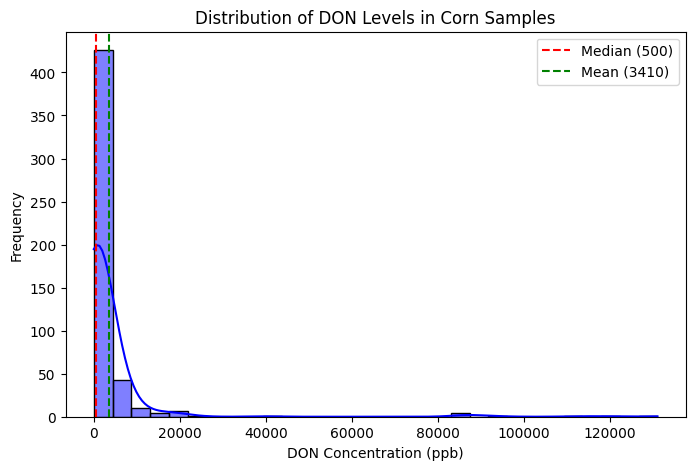

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['vomitoxin_ppb'], bins=30, kde=True, color="blue")
plt.axvline(df['vomitoxin_ppb'].median(), color='red', linestyle='dashed', label="Median (500)")
plt.axvline(df['vomitoxin_ppb'].mean(), color='green', linestyle='dashed', label="Mean (3410)")
plt.xlabel("DON Concentration (ppb)")
plt.ylabel("Frequency")
plt.title("Distribution of DON Levels in Corn Samples")
plt.legend()
plt.show()


In [ ]:
df['vomitoxin_ppb'].quantile([0.25, 0.5, 0.75, 0.9, 0.95])

,vomitoxin_ppb
0.25,137.5
0.50,500.0
0.75,1700.0
0.90,5800.0
0.95,8920.0


# Interpretation of the DON Levels Distribution

## Highly Right-Skewed

- The majority of corn samples contain low levels of DON (concentrated around **0–500 ppb**).
- There is a long tail to very high values (**>20,000 ppb**), reflecting a few highly contaminated samples.

## Mean (Green Dashed Line) vs. Median (Red Dashed Line)

- **Median = 500 ppb**: 50% of the samples are at or below this value.
- **Mean = 3,410 ppb**: Much higher than the median because of outliers (those infrequent but extremely high DON values).

## Most Samples Are "Safe"

- The majority of the histogram is close to **0–500 ppb**, indicating the majority of samples are below a "Safe" threshold.
- The extreme high values are quite few but send the mean higher.

## Practical Implications

- **Quality Control**: While the majority of samples are safe, having even a few severely contaminated ones is an issue of food safety.
- **Storage & Handling**: Storage conditions need to be proper to avoid any mold growth leading to DON levels being very high.
- **Skewed Data Handling**: Any statistic or model that is employed needs to handle the heavy right tail (e.g., log transformation or outlier handling robustly).

In general, this histogram presents a **typical long-tailed distribution** for mycotoxin concentration, where **few samples have very high contamination levels**, but **the vast majority are low or safe**.


#**Dropping unnessary features(column)**

In [ ]:
df.drop('hsi_id', axis = 1, inplace = True)

#**Handling Missing Values**

In [ ]:
count = 0
for col, miss_count in df.isna().sum().items():
  if miss_count > 0:
    print(f"{col}: {miss_count} missing values")
    count+=1

if count == 0:
  print("No missing values")

No missing values


#**Outlier Removal**

In [ ]:
# Selecting numerical columns excluding 'vomitoxin_ppb' which is the target variable
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols.drop('vomitoxin_ppb', errors='ignore')

# Dictionary to store outlier counts
outlier_summary = {}

# Check outliers for each column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100

    # Store results
    outlier_summary[col] = {'outlier_count': outlier_count, 'outlier_percentage': outlier_percentage}

# Convert results to DataFrame for better readability
outlier_df = pd.DataFrame(outlier_summary).T
print(outlier_df[outlier_df['outlier_percentage'] >3] )


     outlier_count  outlier_percentage
97            16.0                 3.2
100           17.0                 3.4
144           16.0                 3.2


#**Normaization of the dataset**

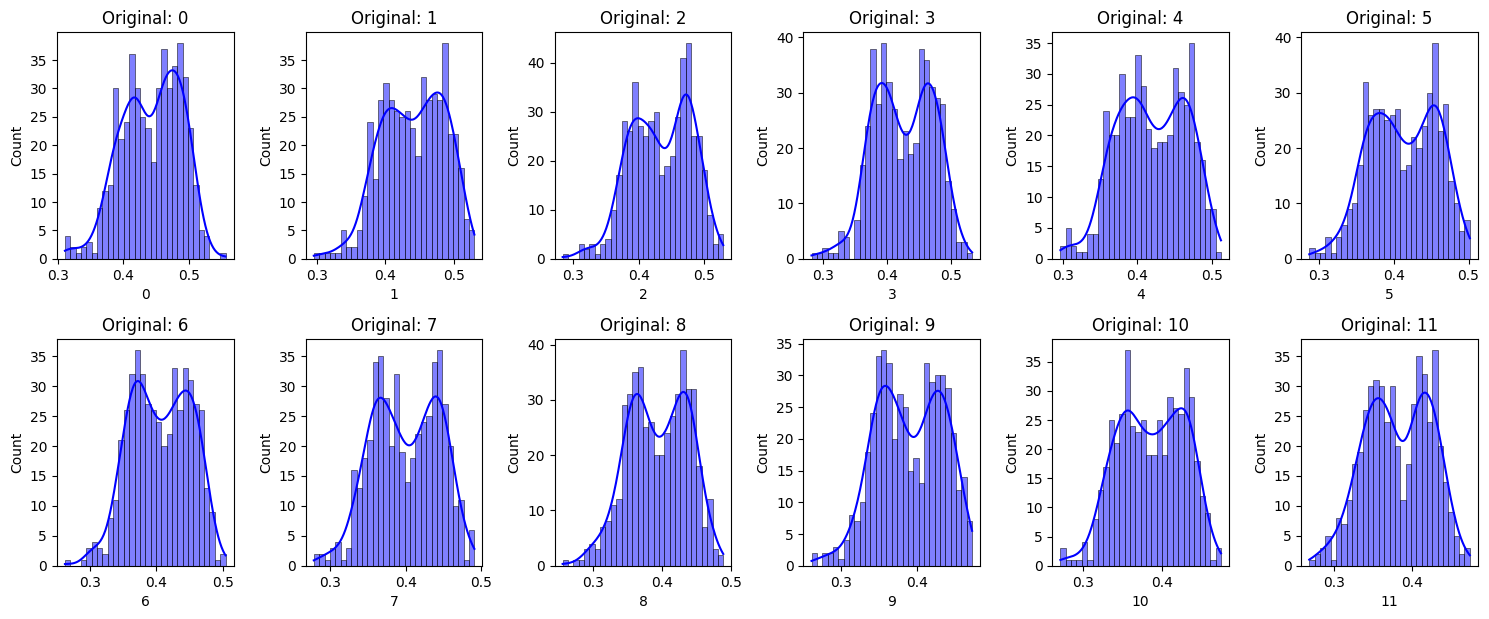

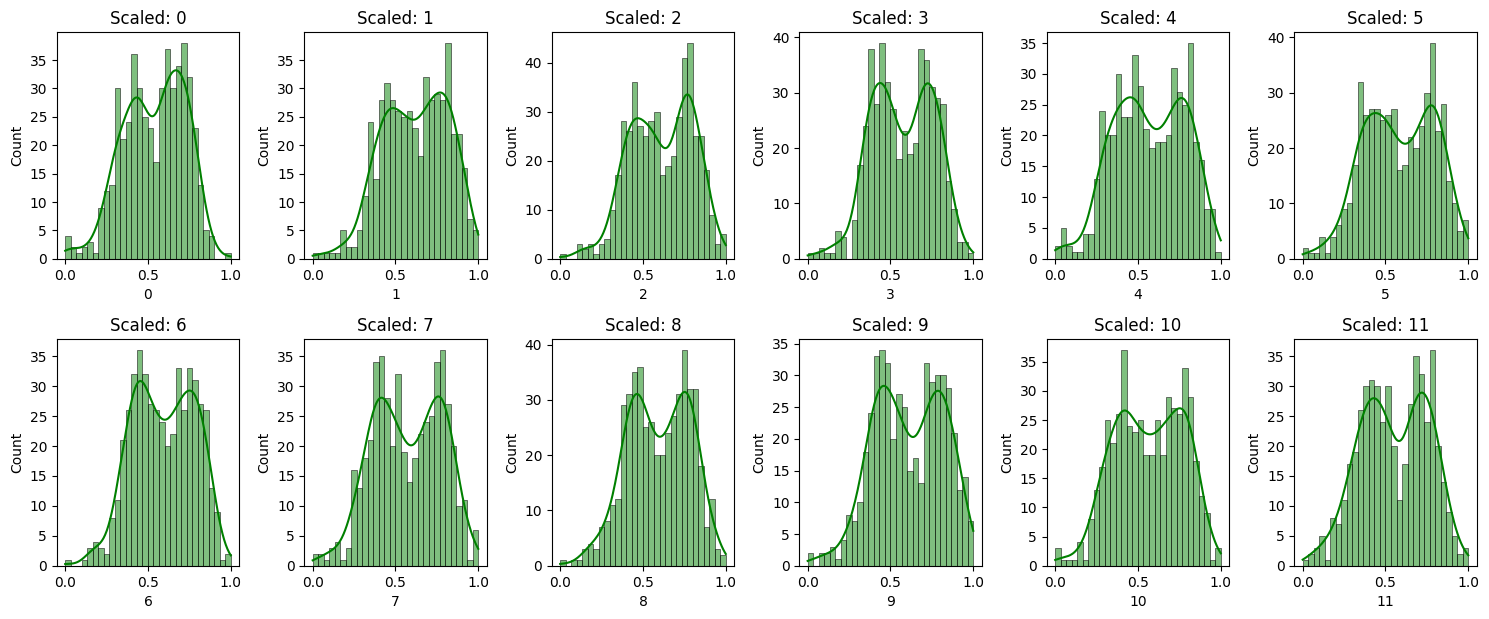

In [ ]:
# Identify numerical features excluding target column
feature_cols = df.select_dtypes(include=['number']).columns.drop('vomitoxin_ppb', errors='ignore')

# Plot original distributions (before scaling)
plt.figure(figsize=(15, 12))
for i, col in enumerate(feature_cols[:12]):  # Limit to 12 features for readability
    plt.subplot(4, 6, i + 1)  # Creating subplots
    sns.histplot(df[col], bins=30, kde=True, color="blue")
    plt.title(f"Original: {col}")
plt.tight_layout()
plt.show()

# Apply Scaling
scaler = MinMaxScaler()

df[feature_cols] = scaler.fit_transform(df[feature_cols])

#Storing the scaler for inference
joblib.dump(scaler, "scaler.pkl")

# Ploting transformed distributions (after scaling)
plt.figure(figsize=(15, 12))
for i, col in enumerate(feature_cols[:12]):  # Limiting to 12 features for better representation and visualization
    plt.subplot(4, 6, i + 1)
    sns.histplot(df[col], bins=30, kde=True, color="green")
    plt.title(f"Scaled: {col}")
plt.tight_layout()
plt.show()


In [ ]:
#This distribution aligns well with both regulatory limits and dataset percentiles.
#The number of Safe samples is dominant, while High Risk is the least frequent
#which is expected in most real-world data.
# 1000, 2500, 5500

def classify_don(don):
    if don <= 1100:
        return 'Safe'
    elif 1101 <= don <= 3000:
        return 'Low Risk'
    elif 3001 <= don <= 6500:
        return 'Moderate Risk'
    else:
        return 'High Risk'

df['DON_category'] = df['vomitoxin_ppb'].apply(classify_don)

# Check the category distribution
print(df['DON_category'].value_counts())

df.drop('vomitoxin_ppb', axis = 1, inplace=True)

DON_category
Safe             340
Low Risk          65
Moderate Risk     51
High Risk         44
Name: count, dtype: int64


<ipython-input-10-b046280af563>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['DON_category'] = df['vomitoxin_ppb'].apply(classify_don)


<ipython-input-24-1bab6ae7804c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


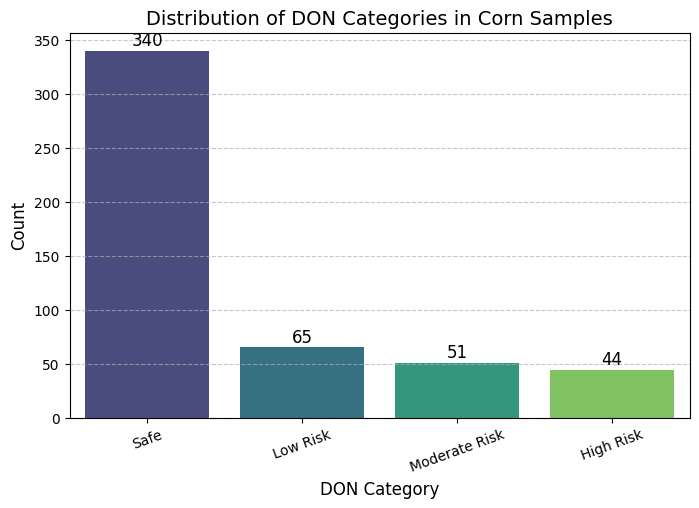

In [ ]:
# Count the number of samples in each category
category_counts = df['DON_category'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")

# Labels & title
plt.xlabel("DON Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of DON Categories in Corn Samples", fontsize=14)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the values on top of the bars
for i, v in enumerate(category_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=12)

plt.show()


#**Plotting the Mean Spectral Reflectance Curve**

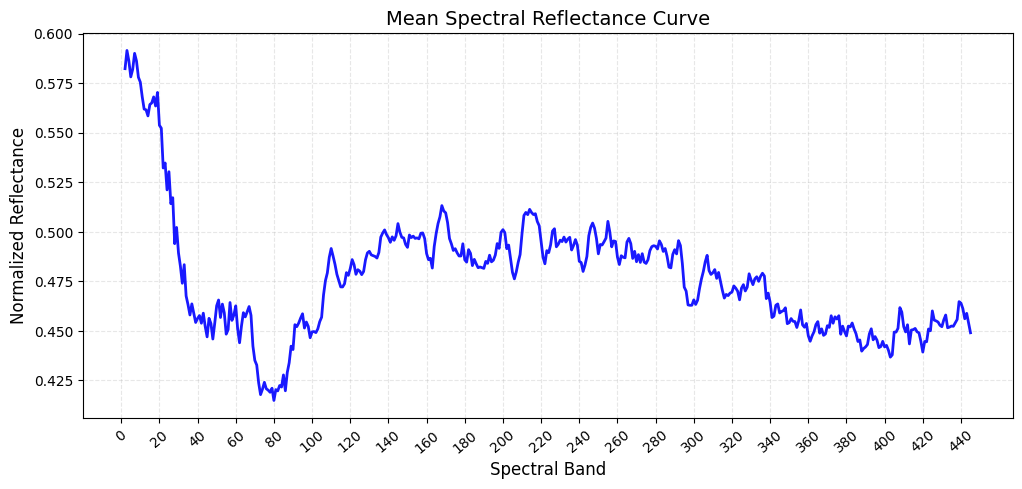

In [ ]:
# Identify spectral columns (excluding target variable)
spectral_cols = [col for col in df.columns if col not in ['vomitoxin_ppb', 'DON_category']]

# Compute mean reflectance
mean_reflectance = df[spectral_cols].mean()

window_size = 5
mean_reflectance_smooth = mean_reflectance.rolling(window=window_size, center=True).mean()

# Ploting the reflectance curve
plt.figure(figsize=(12, 5))
plt.plot(spectral_cols, mean_reflectance_smooth, linestyle='-', color='b', alpha=0.9, linewidth=2)

# Improve X-axis readability
plt.xticks(rotation=40)
plt.xticks(ticks=np.arange(0, len(spectral_cols), step=20))  # Show every 20th band

# Labels & title
plt.xlabel("Spectral Band", fontsize=12)
plt.ylabel("Normalized Reflectance", fontsize=12)
plt.title("Mean Spectral Reflectance Curve", fontsize=14)

# Grid for readability
plt.grid(True, linestyle="--", alpha=0.3)

plt.show()


# Mean Normalized Reflectance of Corn Samples

This graph presents the **mean normalized reflectance** of the corn samples across **450 bands of spectra**, providing a single **"average" spectral signature**. Below are some key observations:

## Overall Shape

- Reflectance starts **comparatively high** (≈0.58), takes a **steep dive** around **bands 10–20**, and then **bounces back** to a steadier plateau (≈0.48–0.50) through the central bands.
- From **band 200 onward**, there is a **consistent decline** (≈0.45 around **band 400**), indicating **decreasing reflectance** at larger wavelengths.

## Normalized Scale

- Since the data is **normalized**, values fluctuate between **0.42–0.58**, meaning these **reflectance differences are relative, not absolute**.
- Peaks and troughs in the curve represent **relative absorption/reflection characteristics** of the corn samples.

## Possible Spectral Features

- The **sharp decline** towards **bands 10–20** might correspond to a **known absorption feature**, potentially linked to:
  - **Moisture content**
  - **Specific chemical bonds**
  - **Pigments**
- The **steady central section** suggests **minimal intense absorption**, with reflectance remaining **intermediate**.
- The **downturn after band 200** may indicate:
  - **Rising absorption**
  - **Falling reflectance**
  - Potential associations with **starch, protein, or other chemical components**.

## Interpretation for Corn Quality

- **Spectral reflectance plots** highlight **chemical or structural features** (e.g., **moisture, protein, starch**).
- If certain spectral bands are **highly correlated** with **DON infestation**, reflectance changes **near those wavelengths** may distinguish **contaminated samples**.



#**Plotting the Spectral Reflectance Heatmap**

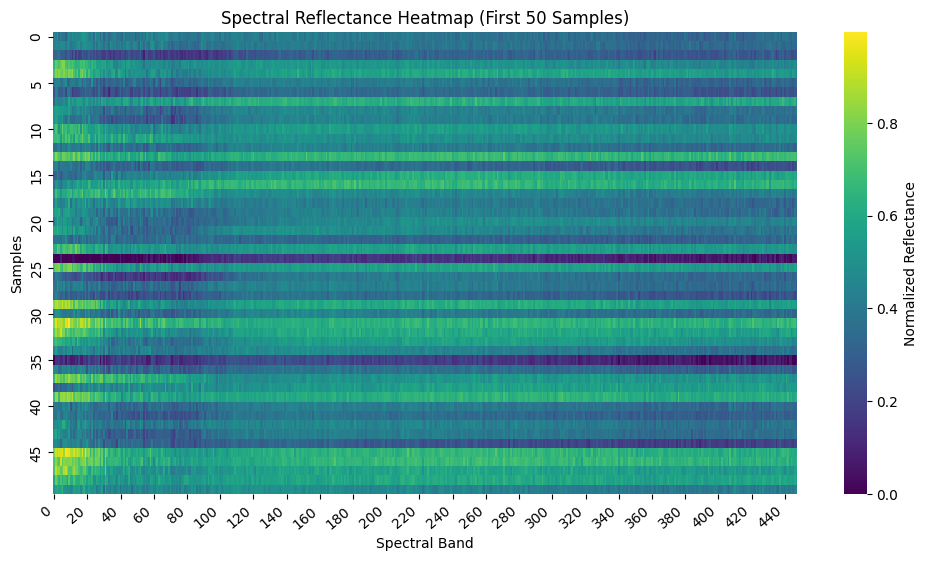

In [ ]:
# Select a subset of samples (first 50 rows for visualization)
df_subset = df[spectral_cols].iloc[:50]

# Plot heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(
    df_subset, cmap='viridis', xticklabels=20, yticklabels=5,
    linecolor=None, linewidth=0.2, cbar_kws={'label': "Normalized Reflectance"}
)

# Improve readability
plt.xticks(rotation=40, ha="right")
plt.xlabel("Spectral Band")
plt.ylabel("Samples")
plt.title("Spectral Reflectance Heatmap (First 50 Samples)")

plt.show()


# Spectral Reflectance Heatmap Analysis

This heatmap displays **spectral reflectance** for the **first 50 corn samples** over **~450 wavelength bands**.  
- **Rows** correspond to individual **samples**.  
- **Columns** correspond to **specific spectral bands**.  
- **Color scale** represents **normalized reflectance**:
  - **Bright yellow** = High reflectance  
  - **Dark purple** = Low reflectance  

## Key Observations  

### **Row-by-Row Variation**  
- Each **horizontal row** represents a **sample's reflectance profile** across all bands.  
- Some rows have **brighter (yellow) spots**, indicating **stronger reflectance** at specific wavelengths.  
- Other rows appear **darker overall**, suggesting **lower reflectance levels**.  

### **Column-by-Column Patterns**  
- Each **vertical column** represents a **single spectral band** (e.g., **band 50, band 200**).  
- **Consistently darker or lighter bands** indicate common **absorption or reflection characteristics** across samples.  
- Certain columns (**around band 20 or band 80**) show **dominantly yellow or purple regions**, suggesting **major absorption features**.  

### **Sample Outliers**  
- Some **rows**, particularly **around sample #30**, display **distinct reflectance patterns**.  
- These could indicate **differences in chemical composition, moisture levels, or contamination**.  

## **Interpretation for DON Analysis**  
- If **contaminated samples** exhibit unique **reflectance patterns** (**e.g., more purple in certain bands**), these wavelengths could help **identify DON presence**.  
- Conversely, **safe samples** may display a **more even reflectance pattern** across key spectral bands.  


#**Dimentionality Reduction**

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,DON_category
0,0.428384,0.432294,0.510485,0.361585,0.411656,0.365379,0.382911,0.305546,0.382076,0.475299,...,0.390543,0.372789,0.411477,0.372650,0.330556,0.324067,0.376234,0.340562,0.359537,Safe
1,0.426816,0.458322,0.484244,0.453758,0.466945,0.478181,0.467686,0.401405,0.506341,0.466313,...,0.321045,0.315913,0.377114,0.346713,0.342318,0.282899,0.335534,0.337359,0.320439,Safe
2,0.317584,0.323124,0.363833,0.365593,0.299035,0.292418,0.294413,0.246585,0.314003,0.296242,...,0.318514,0.237159,0.275166,0.291190,0.275842,0.225416,0.228563,0.265252,0.260075,Low Risk
3,0.643212,0.757663,0.731006,0.705884,0.766564,0.804758,0.809852,0.703279,0.683790,0.719998,...,0.476533,0.410269,0.468494,0.441426,0.479585,0.446448,0.463770,0.501336,0.432737,Low Risk
4,0.702433,0.817355,0.756362,0.818619,0.777502,0.764411,0.809995,0.764764,0.730135,0.802499,...,0.549142,0.529060,0.533219,0.534680,0.509626,0.461215,0.556841,0.517629,0.479541,Safe


Explained Variance by Components: [0.8582386  0.06683037 0.01916925 0.01566534 0.00224071]
Cumulative Variance: [0.8582386  0.92506897 0.94423822 0.95990356 0.96214428]


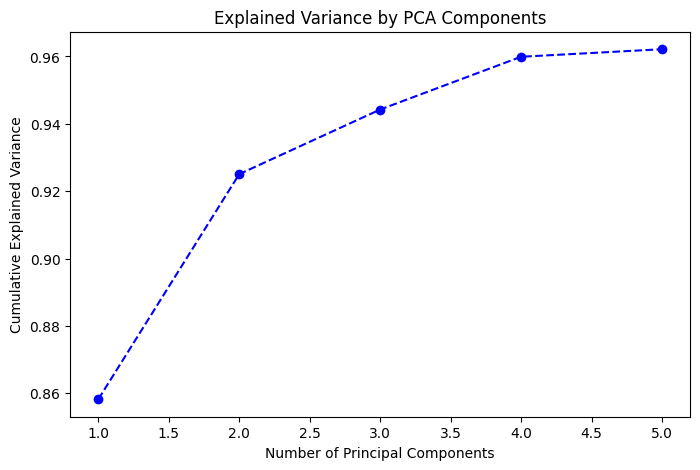

<ipython-input-28-568810ef1dc3>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, cmap='viridis')


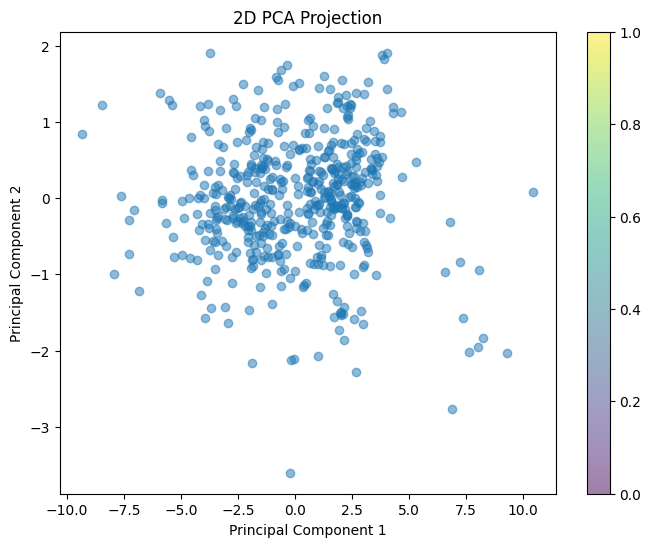

<ipython-input-28-568810ef1dc3>:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.5, cmap='viridis')


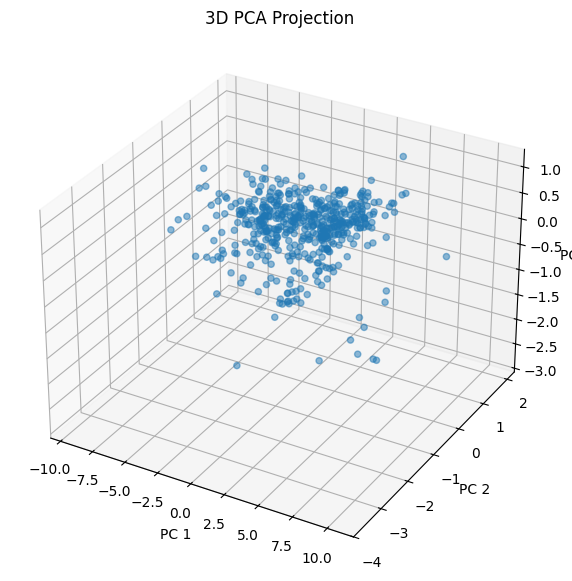

In [ ]:
X = df.iloc[:, :-1]
pca = PCA(n_components=5)  # Reduce to top 5 component
X_pca = pca.fit_transform(X)


# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Components:", explained_variance)
print("Cumulative Variance:", np.cumsum(explained_variance))

# Ploting Explained Variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()

# 2D Visualization using first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection')
plt.colorbar()
plt.show()

# 3D Visualization using first three principal components
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.5, cmap='viridis')

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('3D PCA Projection')
plt.show()

# Principal Component Analysis (PCA) Insights  

## 1. Cumulative Explained Variance Plot  

### **What It Shows**  
- **X-axis**: Number of **principal components (PCs)**.  
- **Y-axis**: **Cumulative explained variance**, representing the proportion of the total variance explained by the first **k components**.  

### **Interpretation**  
- A **sharp jump** occurs from **PC1 to PC2**, meaning **PC1 and PC2 together** explain **more than 90%** of the variance.  
- By the time we reach **5 principal components**, **96% of the variance** is captured, indicating that **5 components are sufficient** to represent most of the data’s variability.  

### **Why It Matters**  
- This plot helps determine **how many components to retain**.  
- If **2 or 3 PCs** capture the majority of variance, **dimensionality reduction** can be applied effectively.  
- **Fewer components** lead to **faster modeling** and help **prevent overfitting**.  

---

## 2. 2D PCA Projection  

### **What It Displays**  
- Each **point** represents a **sample**, plotted in **PC1 space (x-axis) vs. PC2 space (y-axis)**.  
- A **color bar** (0 to 1) may be used to represent a **normalized feature or DON category**.  

### **Interpretation**  
- Samples are **clustered near the center**, with a **wide spread in all directions**.  
- No **clear, well-separated groups**, meaning **PC1 and PC2 alone** do not strongly separate categories (e.g., **safe vs. contaminated**).  
- Some **samples appear far left or right**, indicating **distinct spectral features captured by PC1 or PC2**.  

### **Why It Matters**  
- **2D visualization** provides a **quick check** for **natural clusters or outliers**.  
- If **clear groupings** appear, this suggests **similar chemical or spectral properties** among those samples.  
- If **classes are labeled**, coloring them can **reveal class separability** in PCA space.  

---

## 3. 3D PCA Projection  

### **What It Shows**  
- Each **point is projected** in **PC1, PC2, and PC3 space**, adding **an extra dimension** beyond 2D PCA.  
- Samples remain **clustered**, but the **distribution is more spread out** than in 2D.  

### **Interpretation**  
- **Three major components** explain **~95% variance**, improving separation over 2D PCA.  
- **Outlier samples** may appear **far away along PC3**, indicating distinct spectral properties.  



#**XGBoost Classifier**

Class Weights: [7.7272727272727275, 5.230769230769231, 6.666666666666667, 1.0]
Accuracy: 0.6800

Classification Report:
               precision    recall  f1-score   support

    High Risk       0.50      0.78      0.61         9
     Low Risk       0.20      0.23      0.21        13
Moderate Risk       0.40      0.44      0.42         9
         Safe       0.89      0.78      0.83        69

     accuracy                           0.68       100
    macro avg       0.50      0.56      0.52       100
 weighted avg       0.72      0.68      0.69       100



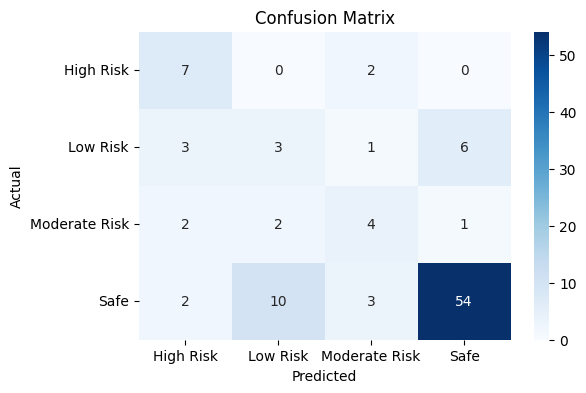

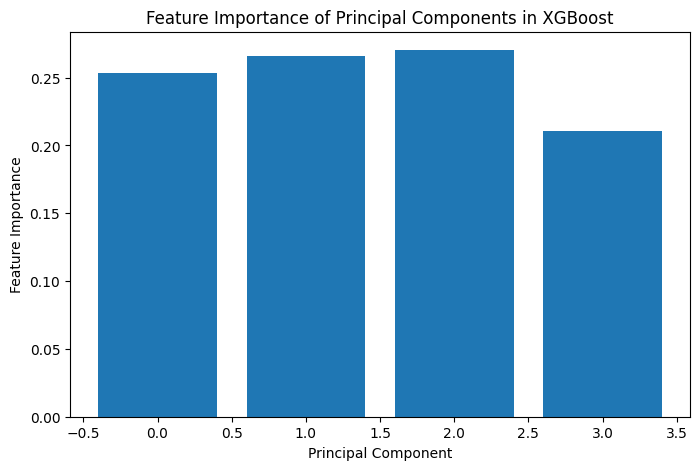

In [ ]:
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable

# Label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Get class distribution for weights
class_counts = Counter(y_encoded)

# Compute scale_pos_weight for each class
scale_pos_weights = {class_label: max(class_counts.values()) / count for class_label, count in class_counts.items()}

# Convert to list for XGBoost
class_weights = [scale_pos_weights[i] for i in range(len(class_counts))]

print("Class Weights:", class_weights)

# Find the encoded value of "Safe"
safe_label = label_encoder.transform(['Safe'])[0]  # Get numeric value of "Safe"

# Compute scale_pos_weight
scale_weight = len(y_encoded[y_encoded == safe_label]) / len(y_encoded[y_encoded != safe_label])

# Applying PCA - retaining the ~95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)


adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)


xgb_clf = XGBClassifier(
    objective="multi:softprob",
    num_class=len(np.unique(y_encoded)),
    eval_metric="mlogloss",
    learning_rate=0.06,
    max_depth=7,
    n_estimators=500,
    min_child_weight=1,  # Helps prevent bias towards majority class
    subsample=0.8,
    colsample_bytree=0.8
)
xgb_clf.fit(X_train_resampled, y_train_resampled, sample_weight=[class_weights[i] for i in y_train_resampled])


# Predictions
y_pred = xgb_clf.predict(X_test)

# Evaluating performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Ploting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance plot
plt.figure(figsize=(8, 5))
plt.bar(range(pca.n_components_), xgb_clf.feature_importances_)
plt.xlabel("Principal Component")
plt.ylabel("Feature Importance")
plt.title("Feature Importance of Principal Components in XGBoost")
plt.show()


#**Hyperparametr Tuning For XGBoost Classifier**

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.03, 0.05],
    'max_depth': [6, 8, 10],
    'n_estimators': [300, 500],
    'min_child_weight': [1, 3, 5]
}

grid_search = GridSearchCV(XGBClassifier(objective="multi:softprob", num_class=len(np.unique(y_encoded))),
                           param_grid, scoring='f1_weighted', cv=10)
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 0.05, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 500}


#**TabNet Classifier:- This is the Classifier I will be Using for Streamlit App**

#**Importing Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek

from sklearn.utils.class_weight import compute_sample_weight
from collections import Counter


import seaborn as sns
import matplotlib.pyplot as plt

# **Loading the dataset, Separating features and target variables and doing Train-Test Split**

In [ ]:
X = df.iloc[:, :-1].values  # Spectral features
y = df.iloc[:, -1].values   # Target variable

# Encodeing DON categories as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts ----> {'High Risk', 'Low Risk', 'Moderate Risk', 'Safe'} → [0,1,2,3]

label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

# Splitting the dataset into training and testing split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#Spliting the Training set into Train and Validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)



Label Mapping: {'High Risk': 0, 'Low Risk': 1, 'Moderate Risk': 2, 'Safe': 3}


#**Using TabNet Classifier**

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.24567 | train_accuracy: 0.09062 | val_accuracy: 0.0875  |  0:00:00s
epoch 1  | loss: 1.91905 | train_accuracy: 0.0875  | val_accuracy: 0.0875  |  0:00:01s
epoch 2  | loss: 1.70388 | train_accuracy: 0.0875  | val_accuracy: 0.0875  |  0:00:02s
epoch 3  | loss: 1.42644 | train_accuracy: 0.09688 | val_accuracy: 0.0875  |  0:00:02s
epoch 4  | loss: 1.33066 | train_accuracy: 0.0875  | val_accuracy: 0.0875  |  0:00:03s
epoch 5  | loss: 1.2678  | train_accuracy: 0.09062 | val_accuracy: 0.1     |  0:00:04s
epoch 6  | loss: 1.26443 | train_accuracy: 0.09688 | val_accuracy: 0.0875  |  0:00:05s
epoch 7  | loss: 1.23218 | train_accuracy: 0.09062 | val_accuracy: 0.0875  |  0:00:05s
epoch 8  | loss: 1.22566 | train_accuracy: 0.09062 | val_accuracy: 0.0875  |  0:00:06s
epoch 9  | loss: 1.14003 | train_accuracy: 0.09062 | val_accuracy: 0.0875  |  0:00:06s
epoch 10 | loss: 1.10186 | train_accuracy: 0.09375 | val_accuracy: 0.0875  |  0:00:07s
epoch 11 | loss: 1.02277 | train_accuracy: 

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


TabNet Accuracy: 0.7100

Classification Report:
               precision    recall  f1-score   support

    High Risk       0.43      0.67      0.52         9
     Low Risk       0.50      0.38      0.43        13
Moderate Risk       0.33      0.56      0.42         9
         Safe       0.90      0.80      0.85        69

     accuracy                           0.71       100
    macro avg       0.54      0.60      0.55       100
 weighted avg       0.76      0.71      0.72       100



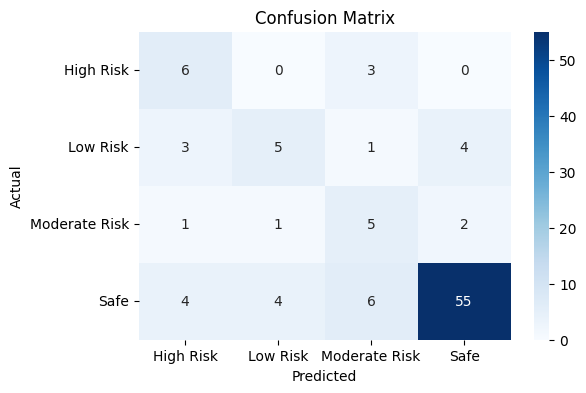

In [ ]:
# Defining the TabNet Model

tabnet_model = TabNetClassifier(
    n_d=128,
    n_a=96,
    n_steps=4,
    gamma=1.7000000000000002,
    lambda_sparse=1e-3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr= 0.005866228683199912, weight_decay=1e-4),  # Modified LR here
    scheduler_params={"step_size":10, "gamma":0.8},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type="entmax",
    device_name="cuda" if torch.cuda.is_available() else "cpu"
)

class_counts = Counter(y_encoded)

sample_weights = compute_sample_weight(class_weight={0: 7.155179270800565, 1: 8.2254370650824087, 2:5.418612371223786, 3: 1.043063298487828}, y=y_train_resampled)

# Training the TabNet with Label Smoothing
tabnet_model.fit(
    X_train_resampled, y_train_resampled,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_name=['train', 'val'],
    eval_metric=['accuracy'],
    max_epochs=55,
    patience=20,
    batch_size=64,
    virtual_batch_size=16,
    weights=sample_weights,
    loss_fn=nn.CrossEntropyLoss(label_smoothing=0.1)
)

# Geting the Predictions
y_pred = tabnet_model.predict(X_test)

# Converting Predictions Back to Original Labels
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred)

# Calculating the Accuracy
accuracy = accuracy_score(y_test_original, y_pred_original)
print(f"TabNet Accuracy: {accuracy:.4f}")

# Printing the Classification Report
print("\nClassification Report:")
print(classification_report(y_test_original, y_pred_original, target_names=label_encoder.classes_))

# Ploting the Confusion Matrix
cm = confusion_matrix(y_test_original, y_pred_original)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#**AUPRC Evaluation**


AUPRC for each class:
High Risk: 0.5716
Low Risk: 0.3711
Moderate Risk: 0.3801
Safe: 0.8914
Macro AUPRC: 0.5536


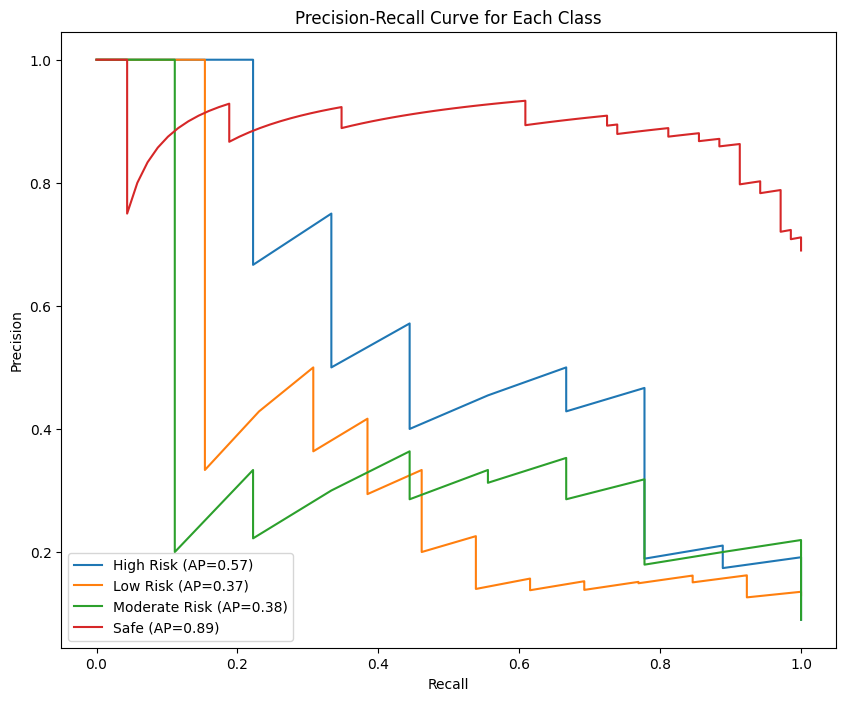

In [ ]:
# Since the F1 Score and Confusion Matrix is not a good evaluation criteria so we are going for AUPRC Evaluation

# Getting the class probabilities
y_proba = tabnet_model.predict_proba(X_test)

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])

# Calculate AUPRC for each class individually
auprc_scores = {}
for i, class_name in enumerate(label_encoder.classes_):
    auprc_scores[class_name] = average_precision_score(y_test_binarized[:, i], y_proba[:, i])

# Calculatiing macro-average AUPRC
macro_auprc = average_precision_score(y_test_binarized, y_proba, average="macro")

print("\nAUPRC for each class:")
for class_name, score in auprc_scores.items():
    print(f"{class_name}: {score:.4f}")
print(f"Macro AUPRC: {macro_auprc:.4f}")

# Plot the Precision-Recall Curves for Each Class
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(label_encoder.classes_):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_proba[:, i])
    plt.plot(recall, precision, label=f'{class_name} (AP={auprc_scores[class_name]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend()
plt.show()

#**Hyperparameter Tuning for TabNet Classifier**

In [ ]:
import optuna
from pytorch_tabnet.tab_model import TabNetClassifier
import torch.nn as nn
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_sample_weight

def objective(trial):
    # Suggesting hyperparameters
    n_d = trial.suggest_int("n_d", 32, 128, step=32)
    n_a = trial.suggest_int("n_a", 32, 128, step=32)
    n_steps = trial.suggest_int("n_steps", 3, 7)
    gamma = trial.suggest_float("gamma", 1.0, 2.0, step=0.1)
    lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    virtual_batch_size = trial.suggest_categorical("virtual_batch_size", [8, 16, 32])

    # Suggesting class weight multipliers for each class
    w_high_risk = trial.suggest_float("w_high_risk", 1.0, 10.0)
    w_low_risk = trial.suggest_float("w_low_risk", 1.0, 10.0)
    w_moderate_risk = trial.suggest_float("w_moderate_risk", 1.0, 10.0)
    w_safe = trial.suggest_float("w_safe", 1.0, 10.0)

    # Creating weight dictionary
    class_weights = {0: w_high_risk, 1: w_low_risk, 2: w_moderate_risk, 3: w_safe}
    sample_weights = compute_sample_weight(class_weight=class_weights, y=y_train_resampled)

    # Defining the TabNet model with the suggested hyperparameters
    model = TabNetClassifier(
        n_d=n_d,
        n_a=n_a,
        n_steps=n_steps,
        gamma=gamma,
        lambda_sparse=1e-3,
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=lr, weight_decay=1e-4),
        scheduler_params={"step_size": 10, "gamma": 0.8},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type="entmax",
        device_name="cuda" if torch.cuda.is_available() else "cpu"
    )

    model.fit(
        X_train_resampled, y_train_resampled,
        eval_set=[(X_val, y_val)],
        eval_name=['val'],
        eval_metric=['accuracy'],
        max_epochs=100,
        patience=20,
        batch_size=batch_size,
        virtual_batch_size=virtual_batch_size,
        weights=sample_weights,
        loss_fn=nn.CrossEntropyLoss(label_smoothing=0.1)
    )

    # Evaluating on the validation set
    y_pred_val = model.predict(X_val)
    acc_val = accuracy_score(y_val, y_pred_val)
    return acc_val

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

print("Best trial:", study.best_trial.params)


[I 2025-03-13 05:58:26,262] A new study created in memory with name: no-name-6f4cdca1-5511-46d6-ae06-12edb753b1df
<ipython-input-51-857f385e3cd4>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.44345 | val_accuracy: 0.1     |  0:00:01s
epoch 1  | loss: 2.02031 | val_accuracy: 0.1625  |  0:00:01s
epoch 2  | loss: 1.83716 | val_accuracy: 0.125   |  0:00:02s
epoch 3  | loss: 1.62638 | val_accuracy: 0.125   |  0:00:02s
epoch 4  | loss: 1.5173  | val_accuracy: 0.1375  |  0:00:03s
epoch 5  | loss: 1.42295 | val_accuracy: 0.1     |  0:00:04s
epoch 6  | loss: 1.4277  | val_accuracy: 0.1     |  0:00:04s
epoch 7  | loss: 1.37182 | val_accuracy: 0.0875  |  0:00:05s
epoch 8  | loss: 1.34647 | val_accuracy: 0.1125  |  0:00:05s
epoch 9  | loss: 1.2814  | val_accuracy: 0.1125  |  0:00:06s
epoch 10 | loss: 1.20879 | val_accuracy: 0.125   |  0:00:07s
epoch 11 | loss: 1.27265 | val_accuracy: 0.1     |  0:00:07s
epoch 12 | loss: 1.2406  | val_accuracy: 0.1125  |  0:00:08s
epoch 13 | loss: 1.24138 | val_accuracy: 0.0875  |  0:00:09s
epoch 14 | loss: 1.228   | val_accuracy: 0.1     |  0:00:10s
epoch 15 | loss: 1.22766 | val_accuracy: 0.1     |  0:00:10s
epoch 16 | loss: 1.23255

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-13 05:59:09,555] Trial 0 finished with value: 0.725 and parameters: {'n_d': 128, 'n_a': 96, 'n_steps': 4, 'gamma': 1.7000000000000002, 'lr': 0.005866228683199912, 'batch_size': 64, 'virtual_batch_size': 8, 'w_high_risk': 7.155179270800565, 'w_low_risk': 2.2254370650824087, 'w_moderate_risk': 5.418612371223786, 'w_safe': 4.543063298487828}. Best is trial 0 with value: 0.725.
<ipython-input-51-857f385e3cd4>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.25361 | val_accuracy: 0.1     |  0:00:00s
epoch 1  | loss: 1.85284 | val_accuracy: 0.1     |  0:00:00s
epoch 2  | loss: 1.70372 | val_accuracy: 0.1     |  0:00:01s
epoch 3  | loss: 1.54294 | val_accuracy: 0.1125  |  0:00:01s
epoch 4  | loss: 1.53593 | val_accuracy: 0.1     |  0:00:02s
epoch 5  | loss: 1.47978 | val_accuracy: 0.1125  |  0:00:02s
epoch 6  | loss: 1.40729 | val_accuracy: 0.1     |  0:00:03s
epoch 7  | loss: 1.37606 | val_accuracy: 0.0875  |  0:00:04s
epoch 8  | loss: 1.36562 | val_accuracy: 0.125   |  0:00:04s
epoch 9  | loss: 1.31898 | val_accuracy: 0.1     |  0:00:05s
epoch 10 | loss: 1.30379 | val_accuracy: 0.1125  |  0:00:05s
epoch 11 | loss: 1.32062 | val_accuracy: 0.1125  |  0:00:06s
epoch 12 | loss: 1.27184 | val_accuracy: 0.1     |  0:00:06s
epoch 13 | loss: 1.23543 | val_accuracy: 0.15    |  0:00:07s
epoch 14 | loss: 1.24282 | val_accuracy: 0.1     |  0:00:07s
epoch 15 | loss: 1.2023  | val_accuracy: 0.25    |  0:00:08s
epoch 16 | loss: 1.19774

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-13 05:59:32,313] Trial 1 finished with value: 0.6375 and parameters: {'n_d': 32, 'n_a': 96, 'n_steps': 4, 'gamma': 1.9, 'lr': 0.005215873023265658, 'batch_size': 64, 'virtual_batch_size': 16, 'w_high_risk': 8.736473114132647, 'w_low_risk': 7.336597172980853, 'w_moderate_risk': 6.059433692201721, 'w_safe': 8.576771184834207}. Best is trial 0 with value: 0.725.
<ipython-input-51-857f385e3cd4>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.27084 | val_accuracy: 0.175   |  0:00:00s
epoch 1  | loss: 2.85774 | val_accuracy: 0.1375  |  0:00:01s
epoch 2  | loss: 2.33818 | val_accuracy: 0.2125  |  0:00:02s
epoch 3  | loss: 2.12764 | val_accuracy: 0.1875  |  0:00:02s
epoch 4  | loss: 1.91287 | val_accuracy: 0.15    |  0:00:03s
epoch 5  | loss: 1.84959 | val_accuracy: 0.125   |  0:00:04s
epoch 6  | loss: 1.82366 | val_accuracy: 0.1     |  0:00:04s
epoch 7  | loss: 1.79779 | val_accuracy: 0.0875  |  0:00:05s
epoch 8  | loss: 1.80416 | val_accuracy: 0.15    |  0:00:06s
epoch 9  | loss: 1.7236  | val_accuracy: 0.1125  |  0:00:07s
epoch 10 | loss: 1.64398 | val_accuracy: 0.1125  |  0:00:08s
epoch 11 | loss: 1.62296 | val_accuracy: 0.1     |  0:00:09s
epoch 12 | loss: 1.67925 | val_accuracy: 0.1     |  0:00:09s
epoch 13 | loss: 1.6609  | val_accuracy: 0.2     |  0:00:11s
epoch 14 | loss: 1.58003 | val_accuracy: 0.1375  |  0:00:12s
epoch 15 | loss: 1.55176 | val_accuracy: 0.1625  |  0:00:13s
epoch 16 | loss: 1.54655

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-13 05:59:51,216] Trial 2 finished with value: 0.2125 and parameters: {'n_d': 32, 'n_a': 32, 'n_steps': 5, 'gamma': 1.5, 'lr': 0.0015085057839518364, 'batch_size': 64, 'virtual_batch_size': 8, 'w_high_risk': 4.421098485136657, 'w_low_risk': 4.056061861755435, 'w_moderate_risk': 8.74350597292835, 'w_safe': 3.9429609523432196}. Best is trial 0 with value: 0.725.
<ipython-input-51-857f385e3cd4>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.04551 | val_accuracy: 0.1     |  0:00:02s
epoch 1  | loss: 3.21142 | val_accuracy: 0.1875  |  0:00:04s
epoch 2  | loss: 2.48184 | val_accuracy: 0.1875  |  0:00:06s
epoch 3  | loss: 2.02519 | val_accuracy: 0.2     |  0:00:08s
epoch 4  | loss: 1.94659 | val_accuracy: 0.1125  |  0:00:10s
epoch 5  | loss: 1.84649 | val_accuracy: 0.1     |  0:00:12s
epoch 6  | loss: 1.76475 | val_accuracy: 0.125   |  0:00:14s
epoch 7  | loss: 1.70034 | val_accuracy: 0.2125  |  0:00:16s
epoch 8  | loss: 1.68457 | val_accuracy: 0.2375  |  0:00:18s
epoch 9  | loss: 1.58175 | val_accuracy: 0.2125  |  0:00:20s
epoch 10 | loss: 1.50005 | val_accuracy: 0.2125  |  0:00:22s
epoch 11 | loss: 1.54131 | val_accuracy: 0.1625  |  0:00:24s
epoch 12 | loss: 1.54157 | val_accuracy: 0.225   |  0:00:26s
epoch 13 | loss: 1.48502 | val_accuracy: 0.2125  |  0:00:29s
epoch 14 | loss: 1.472   | val_accuracy: 0.2125  |  0:00:30s
epoch 15 | loss: 1.44292 | val_accuracy: 0.225   |  0:00:32s
epoch 16 | loss: 1.39779

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-13 06:01:15,786] Trial 3 finished with value: 0.3625 and parameters: {'n_d': 64, 'n_a': 128, 'n_steps': 6, 'gamma': 1.3, 'lr': 0.0006389763997014583, 'batch_size': 16, 'virtual_batch_size': 16, 'w_high_risk': 1.5498130180175826, 'w_low_risk': 2.8031846403889236, 'w_moderate_risk': 5.881950494966303, 'w_safe': 3.432795183085715}. Best is trial 0 with value: 0.725.
<ipython-input-51-857f385e3cd4>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.04867 | val_accuracy: 0.35    |  0:00:01s
epoch 1  | loss: 2.4174  | val_accuracy: 0.1     |  0:00:02s
epoch 2  | loss: 2.1552  | val_accuracy: 0.1375  |  0:00:04s
epoch 3  | loss: 1.99179 | val_accuracy: 0.1875  |  0:00:05s
epoch 4  | loss: 1.72662 | val_accuracy: 0.1375  |  0:00:07s
epoch 5  | loss: 1.64532 | val_accuracy: 0.1     |  0:00:08s
epoch 6  | loss: 1.59541 | val_accuracy: 0.1     |  0:00:09s
epoch 7  | loss: 1.51544 | val_accuracy: 0.125   |  0:00:11s
epoch 8  | loss: 1.45469 | val_accuracy: 0.1875  |  0:00:12s
epoch 9  | loss: 1.41198 | val_accuracy: 0.15    |  0:00:13s
epoch 10 | loss: 1.40222 | val_accuracy: 0.0875  |  0:00:15s
epoch 11 | loss: 1.37724 | val_accuracy: 0.35    |  0:00:16s
epoch 12 | loss: 1.34531 | val_accuracy: 0.1375  |  0:00:17s
epoch 13 | loss: 1.36912 | val_accuracy: 0.25    |  0:00:19s
epoch 14 | loss: 1.33951 | val_accuracy: 0.175   |  0:00:21s
epoch 15 | loss: 1.3294  | val_accuracy: 0.1875  |  0:00:22s
epoch 16 | loss: 1.33621

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-13 06:02:31,553] Trial 4 finished with value: 0.6125 and parameters: {'n_d': 96, 'n_a': 128, 'n_steps': 6, 'gamma': 1.4, 'lr': 0.0021093706416012584, 'batch_size': 32, 'virtual_batch_size': 8, 'w_high_risk': 4.688757662368548, 'w_low_risk': 7.723530691190247, 'w_moderate_risk': 5.001977054857489, 'w_safe': 7.921442593849308}. Best is trial 0 with value: 0.725.
<ipython-input-51-857f385e3cd4>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.42442 | val_accuracy: 0.175   |  0:00:00s
epoch 1  | loss: 2.93257 | val_accuracy: 0.2     |  0:00:01s
epoch 2  | loss: 2.49745 | val_accuracy: 0.1875  |  0:00:02s
epoch 3  | loss: 2.42345 | val_accuracy: 0.175   |  0:00:02s
epoch 4  | loss: 2.36155 | val_accuracy: 0.1875  |  0:00:03s
epoch 5  | loss: 2.22844 | val_accuracy: 0.2     |  0:00:04s
epoch 6  | loss: 2.27854 | val_accuracy: 0.1625  |  0:00:05s
epoch 7  | loss: 2.1037  | val_accuracy: 0.15    |  0:00:05s
epoch 8  | loss: 2.01716 | val_accuracy: 0.1625  |  0:00:06s
epoch 9  | loss: 2.0345  | val_accuracy: 0.1875  |  0:00:07s
epoch 10 | loss: 2.03565 | val_accuracy: 0.1875  |  0:00:08s
epoch 11 | loss: 2.02051 | val_accuracy: 0.1625  |  0:00:09s
epoch 12 | loss: 1.83139 | val_accuracy: 0.175   |  0:00:10s
epoch 13 | loss: 1.89272 | val_accuracy: 0.175   |  0:00:10s
epoch 14 | loss: 1.80419 | val_accuracy: 0.1875  |  0:00:11s
epoch 15 | loss: 1.75399 | val_accuracy: 0.25    |  0:00:12s
epoch 16 | loss: 1.67058

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-13 06:03:01,551] Trial 5 finished with value: 0.2625 and parameters: {'n_d': 96, 'n_a': 32, 'n_steps': 5, 'gamma': 1.2, 'lr': 0.001235245154572409, 'batch_size': 64, 'virtual_batch_size': 8, 'w_high_risk': 3.603852311490495, 'w_low_risk': 6.9893000230734295, 'w_moderate_risk': 6.210037221305108, 'w_safe': 6.449871598235222}. Best is trial 0 with value: 0.725.
<ipython-input-51-857f385e3cd4>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.36726 | val_accuracy: 0.1     |  0:00:01s
epoch 1  | loss: 1.74512 | val_accuracy: 0.1     |  0:00:03s
epoch 2  | loss: 1.58274 | val_accuracy: 0.1     |  0:00:05s
epoch 3  | loss: 1.50974 | val_accuracy: 0.1     |  0:00:07s
epoch 4  | loss: 1.37861 | val_accuracy: 0.1     |  0:00:09s
epoch 5  | loss: 1.32233 | val_accuracy: 0.1625  |  0:00:10s
epoch 6  | loss: 1.32268 | val_accuracy: 0.1125  |  0:00:12s
epoch 7  | loss: 1.24545 | val_accuracy: 0.2375  |  0:00:14s
epoch 8  | loss: 1.25879 | val_accuracy: 0.175   |  0:00:15s
epoch 9  | loss: 1.23829 | val_accuracy: 0.2     |  0:00:18s
epoch 10 | loss: 1.2396  | val_accuracy: 0.15    |  0:00:20s
epoch 11 | loss: 1.14348 | val_accuracy: 0.15    |  0:00:21s
epoch 12 | loss: 1.14308 | val_accuracy: 0.2125  |  0:00:23s
epoch 13 | loss: 1.18818 | val_accuracy: 0.225   |  0:00:24s
epoch 14 | loss: 1.14657 | val_accuracy: 0.2     |  0:00:26s
epoch 15 | loss: 1.14172 | val_accuracy: 0.3125  |  0:00:28s
epoch 16 | loss: 1.09727

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-13 06:05:49,006] Trial 6 finished with value: 0.6875 and parameters: {'n_d': 32, 'n_a': 96, 'n_steps': 5, 'gamma': 1.6, 'lr': 0.002634439580523433, 'batch_size': 16, 'virtual_batch_size': 32, 'w_high_risk': 9.872264677246486, 'w_low_risk': 8.19416512572934, 'w_moderate_risk': 6.2647105694605445, 'w_safe': 4.197929941159855}. Best is trial 0 with value: 0.725.
<ipython-input-51-857f385e3cd4>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.21268 | val_accuracy: 0.1125  |  0:00:02s
epoch 1  | loss: 4.00072 | val_accuracy: 0.1     |  0:00:04s
epoch 2  | loss: 3.90926 | val_accuracy: 0.0875  |  0:00:07s
epoch 3  | loss: 3.43402 | val_accuracy: 0.125   |  0:00:09s
epoch 4  | loss: 3.65539 | val_accuracy: 0.1125  |  0:00:12s
epoch 5  | loss: 3.21039 | val_accuracy: 0.1125  |  0:00:14s
epoch 6  | loss: 3.60948 | val_accuracy: 0.0875  |  0:00:16s
epoch 7  | loss: 3.2992  | val_accuracy: 0.1     |  0:00:19s
epoch 8  | loss: 3.43443 | val_accuracy: 0.1     |  0:00:21s
epoch 9  | loss: 3.06678 | val_accuracy: 0.1     |  0:00:24s
epoch 10 | loss: 2.96531 | val_accuracy: 0.1     |  0:00:26s
epoch 11 | loss: 2.84312 | val_accuracy: 0.0875  |  0:00:28s
epoch 12 | loss: 2.80002 | val_accuracy: 0.1125  |  0:00:31s
epoch 13 | loss: 2.73195 | val_accuracy: 0.125   |  0:00:33s
epoch 14 | loss: 2.63431 | val_accuracy: 0.1125  |  0:00:36s
epoch 15 | loss: 2.57551 | val_accuracy: 0.1     |  0:00:38s
epoch 16 | loss: 2.43983

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-13 06:08:33,376] Trial 7 finished with value: 0.2 and parameters: {'n_d': 32, 'n_a': 32, 'n_steps': 7, 'gamma': 1.7000000000000002, 'lr': 0.00020885352858356516, 'batch_size': 16, 'virtual_batch_size': 8, 'w_high_risk': 3.914846203801832, 'w_low_risk': 9.994994310164941, 'w_moderate_risk': 7.960243740160048, 'w_safe': 5.095740893563343}. Best is trial 0 with value: 0.725.
<ipython-input-51-857f385e3cd4>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.99551 | val_accuracy: 0.3375  |  0:00:00s
epoch 1  | loss: 1.99631 | val_accuracy: 0.325   |  0:00:01s
epoch 2  | loss: 1.87485 | val_accuracy: 0.1375  |  0:00:01s
epoch 3  | loss: 1.94735 | val_accuracy: 0.1375  |  0:00:02s
epoch 4  | loss: 1.90524 | val_accuracy: 0.2375  |  0:00:02s
epoch 5  | loss: 1.8686  | val_accuracy: 0.1625  |  0:00:03s
epoch 6  | loss: 1.82914 | val_accuracy: 0.1625  |  0:00:03s
epoch 7  | loss: 1.85082 | val_accuracy: 0.15    |  0:00:04s
epoch 8  | loss: 1.80327 | val_accuracy: 0.1375  |  0:00:04s
epoch 9  | loss: 1.76212 | val_accuracy: 0.125   |  0:00:05s
epoch 10 | loss: 1.70618 | val_accuracy: 0.1375  |  0:00:05s
epoch 11 | loss: 1.77016 | val_accuracy: 0.175   |  0:00:06s
epoch 12 | loss: 1.73412 | val_accuracy: 0.1875  |  0:00:06s
epoch 13 | loss: 1.67389 | val_accuracy: 0.175   |  0:00:07s
epoch 14 | loss: 1.61838 | val_accuracy: 0.25    |  0:00:08s
epoch 15 | loss: 1.68545 | val_accuracy: 0.2375  |  0:00:09s
epoch 16 | loss: 1.69387

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-13 06:08:45,598] Trial 8 finished with value: 0.3375 and parameters: {'n_d': 32, 'n_a': 64, 'n_steps': 3, 'gamma': 1.4, 'lr': 0.00018160310829093087, 'batch_size': 32, 'virtual_batch_size': 32, 'w_high_risk': 5.714571725021603, 'w_low_risk': 7.939201207651243, 'w_moderate_risk': 9.691498456325403, 'w_safe': 6.651126196934592}. Best is trial 0 with value: 0.725.
<ipython-input-51-857f385e3cd4>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.41174 | val_accuracy: 0.2625  |  0:00:01s
epoch 1  | loss: 2.16065 | val_accuracy: 0.525   |  0:00:02s
epoch 2  | loss: 2.16582 | val_accuracy: 0.3625  |  0:00:03s
epoch 3  | loss: 2.09778 | val_accuracy: 0.4125  |  0:00:04s
epoch 4  | loss: 2.05332 | val_accuracy: 0.375   |  0:00:05s
epoch 5  | loss: 1.97159 | val_accuracy: 0.375   |  0:00:06s
epoch 6  | loss: 2.05241 | val_accuracy: 0.4375  |  0:00:07s
epoch 7  | loss: 1.99831 | val_accuracy: 0.425   |  0:00:08s
epoch 8  | loss: 1.96362 | val_accuracy: 0.45    |  0:00:10s
epoch 9  | loss: 1.9633  | val_accuracy: 0.4875  |  0:00:11s
epoch 10 | loss: 1.80924 | val_accuracy: 0.475   |  0:00:12s
epoch 11 | loss: 1.78966 | val_accuracy: 0.4625  |  0:00:13s
epoch 12 | loss: 1.83632 | val_accuracy: 0.425   |  0:00:14s
epoch 13 | loss: 1.8015  | val_accuracy: 0.45    |  0:00:15s
epoch 14 | loss: 1.77481 | val_accuracy: 0.3875  |  0:00:16s
epoch 15 | loss: 1.82078 | val_accuracy: 0.4625  |  0:00:17s
epoch 16 | loss: 1.90841

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-13 06:09:10,727] Trial 9 finished with value: 0.525 and parameters: {'n_d': 128, 'n_a': 128, 'n_steps': 3, 'gamma': 1.7000000000000002, 'lr': 0.0001532192424061049, 'batch_size': 16, 'virtual_batch_size': 32, 'w_high_risk': 2.2218886076018136, 'w_low_risk': 6.2204864459158, 'w_moderate_risk': 5.284537011496558, 'w_safe': 9.474896015631101}. Best is trial 0 with value: 0.725.
<ipython-input-51-857f385e3cd4>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")

epoch 0  | loss: 2.06639 | val_accuracy: 0.1125  |  0:00:00s
epoch 1  | loss: 1.80677 | val_accuracy: 0.1     |  0:00:01s
epoch 2  | loss: 1.51597 | val_accuracy: 0.0875  |  0:00:01s
epoch 3  | loss: 1.36795 | val_accuracy: 0.125   |  0:00:02s
epoch 4  | loss: 1.21877 | val_accuracy: 0.1     |  0:00:02s
epoch 5  | loss: 1.16062 | val_accuracy: 0.1125  |  0:00:03s
epoch 6  | loss: 1.12401 | val_accuracy: 0.1     |  0:00:03s
epoch 7  | loss: 1.13667 | val_accuracy: 0.1     |  0:00:04s
epoch 8  | loss: 1.09246 | val_accuracy: 0.1     |  0:00:05s
epoch 9  | loss: 1.0632  | val_accuracy: 0.1     |  0:00:05s
epoch 10 | loss: 1.05536 | val_accuracy: 0.1     |  0:00:06s
epoch 11 | loss: 1.03198 | val_accuracy: 0.1     |  0:00:06s
epoch 12 | loss: 1.07065 | val_accuracy: 0.1     |  0:00:07s
epoch 13 | loss: 1.03153 | val_accuracy: 0.1     |  0:00:07s
epoch 14 | loss: 1.01296 | val_accuracy: 0.1     |  0:00:08s
epoch 15 | loss: 0.98504 | val_accuracy: 0.1     |  0:00:09s
epoch 16 | loss: 1.04153

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-13 06:09:25,483] Trial 10 finished with value: 0.125 and parameters: {'n_d': 128, 'n_a': 64, 'n_steps': 4, 'gamma': 2.0, 'lr': 0.006867491465739201, 'batch_size': 64, 'virtual_batch_size': 8, 'w_high_risk': 7.20394275905499, 'w_low_risk': 1.253124351190758, 'w_moderate_risk': 1.9132797584060652, 'w_safe': 1.1206639161518535}. Best is trial 0 with value: 0.725.
<ipython-input-51-857f385e3cd4>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.29494 | val_accuracy: 0.1     |  0:00:01s
epoch 1  | loss: 1.56279 | val_accuracy: 0.1125  |  0:00:02s
epoch 2  | loss: 1.4181  | val_accuracy: 0.1     |  0:00:03s
epoch 3  | loss: 1.44779 | val_accuracy: 0.1     |  0:00:05s
epoch 4  | loss: 1.3245  | val_accuracy: 0.125   |  0:00:06s
epoch 5  | loss: 1.26498 | val_accuracy: 0.1     |  0:00:08s
epoch 6  | loss: 1.18309 | val_accuracy: 0.125   |  0:00:09s
epoch 7  | loss: 1.18417 | val_accuracy: 0.225   |  0:00:11s
epoch 8  | loss: 1.18026 | val_accuracy: 0.2625  |  0:00:12s
epoch 9  | loss: 1.10992 | val_accuracy: 0.3125  |  0:00:13s
epoch 10 | loss: 1.02796 | val_accuracy: 0.175   |  0:00:15s
epoch 11 | loss: 0.99467 | val_accuracy: 0.175   |  0:00:16s
epoch 12 | loss: 1.04674 | val_accuracy: 0.275   |  0:00:17s
epoch 13 | loss: 0.91217 | val_accuracy: 0.225   |  0:00:18s
epoch 14 | loss: 0.97251 | val_accuracy: 0.25    |  0:00:20s
epoch 15 | loss: 0.89791 | val_accuracy: 0.3125  |  0:00:22s
epoch 16 | loss: 0.89617

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-13 06:10:43,715] Trial 11 finished with value: 0.65 and parameters: {'n_d': 64, 'n_a': 96, 'n_steps': 4, 'gamma': 1.7000000000000002, 'lr': 0.003478794905339518, 'batch_size': 16, 'virtual_batch_size': 32, 'w_high_risk': 9.59625704456317, 'w_low_risk': 4.602572857053614, 'w_moderate_risk': 3.5495949192845577, 'w_safe': 2.875737036664893}. Best is trial 0 with value: 0.725.
<ipython-input-51-857f385e3cd4>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.59094 | val_accuracy: 0.1375  |  0:00:00s
epoch 1  | loss: 2.1624  | val_accuracy: 0.1     |  0:00:00s
epoch 2  | loss: 1.75479 | val_accuracy: 0.1     |  0:00:01s
epoch 3  | loss: 1.60037 | val_accuracy: 0.0875  |  0:00:01s
epoch 4  | loss: 1.59707 | val_accuracy: 0.1125  |  0:00:02s
epoch 5  | loss: 1.49711 | val_accuracy: 0.1375  |  0:00:02s
epoch 6  | loss: 1.37546 | val_accuracy: 0.1125  |  0:00:03s
epoch 7  | loss: 1.33315 | val_accuracy: 0.1     |  0:00:03s
epoch 8  | loss: 1.23246 | val_accuracy: 0.1     |  0:00:03s
epoch 9  | loss: 1.28467 | val_accuracy: 0.1     |  0:00:04s
epoch 10 | loss: 1.22411 | val_accuracy: 0.1125  |  0:00:04s
epoch 11 | loss: 1.17456 | val_accuracy: 0.1125  |  0:00:05s
epoch 12 | loss: 1.08334 | val_accuracy: 0.125   |  0:00:05s
epoch 13 | loss: 1.17369 | val_accuracy: 0.1125  |  0:00:06s
epoch 14 | loss: 1.11076 | val_accuracy: 0.1     |  0:00:07s
epoch 15 | loss: 1.09985 | val_accuracy: 0.15    |  0:00:07s
epoch 16 | loss: 0.97462

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-13 06:11:14,082] Trial 12 finished with value: 0.65 and parameters: {'n_d': 96, 'n_a': 96, 'n_steps': 5, 'gamma': 1.8, 'lr': 0.009047890702581473, 'batch_size': 64, 'virtual_batch_size': 32, 'w_high_risk': 7.599428731241756, 'w_low_risk': 9.70198301820369, 'w_moderate_risk': 7.37178039069338, 'w_safe': 4.860154650602063}. Best is trial 0 with value: 0.725.
<ipython-input-51-857f385e3cd4>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.32841 | val_accuracy: 0.1     |  0:00:02s
epoch 1  | loss: 2.40119 | val_accuracy: 0.0875  |  0:00:04s
epoch 2  | loss: 2.26734 | val_accuracy: 0.125   |  0:00:06s
epoch 3  | loss: 2.01833 | val_accuracy: 0.1125  |  0:00:08s
epoch 4  | loss: 1.98404 | val_accuracy: 0.1125  |  0:00:09s
epoch 5  | loss: 2.04911 | val_accuracy: 0.1     |  0:00:11s
epoch 6  | loss: 1.84406 | val_accuracy: 0.125   |  0:00:13s
epoch 7  | loss: 1.87964 | val_accuracy: 0.15    |  0:00:15s
epoch 8  | loss: 1.85201 | val_accuracy: 0.175   |  0:00:17s
epoch 9  | loss: 1.75644 | val_accuracy: 0.1625  |  0:00:19s
epoch 10 | loss: 1.7378  | val_accuracy: 0.1625  |  0:00:21s
epoch 11 | loss: 1.68815 | val_accuracy: 0.175   |  0:00:23s
epoch 12 | loss: 1.59091 | val_accuracy: 0.1125  |  0:00:25s
epoch 13 | loss: 1.57303 | val_accuracy: 0.15    |  0:00:27s
epoch 14 | loss: 1.48223 | val_accuracy: 0.0625  |  0:00:29s
epoch 15 | loss: 1.51417 | val_accuracy: 0.1625  |  0:00:31s
epoch 16 | loss: 1.49074

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-13 06:14:20,934] Trial 13 finished with value: 0.3 and parameters: {'n_d': 64, 'n_a': 96, 'n_steps': 6, 'gamma': 1.0, 'lr': 0.0005478401750349329, 'batch_size': 16, 'virtual_batch_size': 32, 'w_high_risk': 6.644013078085019, 'w_low_risk': 1.6227919073535328, 'w_moderate_risk': 3.937564294127133, 'w_safe': 1.9722427862167513}. Best is trial 0 with value: 0.725.
<ipython-input-51-857f385e3cd4>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.37058 | val_accuracy: 0.2875  |  0:00:00s
epoch 1  | loss: 2.15133 | val_accuracy: 0.1     |  0:00:01s
epoch 2  | loss: 1.83033 | val_accuracy: 0.1     |  0:00:02s
epoch 3  | loss: 1.72293 | val_accuracy: 0.1     |  0:00:02s
epoch 4  | loss: 1.52839 | val_accuracy: 0.1125  |  0:00:03s
epoch 5  | loss: 1.50377 | val_accuracy: 0.1     |  0:00:04s
epoch 6  | loss: 1.4012  | val_accuracy: 0.125   |  0:00:05s
epoch 7  | loss: 1.39272 | val_accuracy: 0.125   |  0:00:05s
epoch 8  | loss: 1.4091  | val_accuracy: 0.125   |  0:00:06s
epoch 9  | loss: 1.35553 | val_accuracy: 0.125   |  0:00:07s
epoch 10 | loss: 1.30546 | val_accuracy: 0.1375  |  0:00:08s
epoch 11 | loss: 1.25465 | val_accuracy: 0.1875  |  0:00:09s
epoch 12 | loss: 1.25847 | val_accuracy: 0.1625  |  0:00:10s
epoch 13 | loss: 1.21169 | val_accuracy: 0.2875  |  0:00:11s
epoch 14 | loss: 1.2012  | val_accuracy: 0.4375  |  0:00:11s
epoch 15 | loss: 1.18479 | val_accuracy: 0.45    |  0:00:12s
epoch 16 | loss: 1.18472

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-13 06:15:18,320] Trial 14 finished with value: 0.7125 and parameters: {'n_d': 128, 'n_a': 64, 'n_steps': 4, 'gamma': 1.6, 'lr': 0.003354604235979455, 'batch_size': 32, 'virtual_batch_size': 16, 'w_high_risk': 8.619720254278244, 'w_low_risk': 5.254240688681753, 'w_moderate_risk': 3.5176341656261703, 'w_safe': 6.00207717568269}. Best is trial 0 with value: 0.725.
<ipython-input-51-857f385e3cd4>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.16849 | val_accuracy: 0.1     |  0:00:00s
epoch 1  | loss: 1.7986  | val_accuracy: 0.1     |  0:00:01s
epoch 2  | loss: 1.57395 | val_accuracy: 0.1     |  0:00:02s
epoch 3  | loss: 1.36955 | val_accuracy: 0.1625  |  0:00:03s
epoch 4  | loss: 1.36638 | val_accuracy: 0.125   |  0:00:04s
epoch 5  | loss: 1.23955 | val_accuracy: 0.425   |  0:00:05s
epoch 6  | loss: 1.212   | val_accuracy: 0.5     |  0:00:06s
epoch 7  | loss: 1.19262 | val_accuracy: 0.175   |  0:00:06s
epoch 8  | loss: 1.08817 | val_accuracy: 0.325   |  0:00:07s
epoch 9  | loss: 1.06118 | val_accuracy: 0.35    |  0:00:08s
epoch 10 | loss: 1.11992 | val_accuracy: 0.2875  |  0:00:08s
epoch 11 | loss: 1.05153 | val_accuracy: 0.6125  |  0:00:09s
epoch 12 | loss: 0.95024 | val_accuracy: 0.3375  |  0:00:10s
epoch 13 | loss: 0.96091 | val_accuracy: 0.575   |  0:00:11s
epoch 14 | loss: 0.92391 | val_accuracy: 0.575   |  0:00:11s
epoch 15 | loss: 0.9627  | val_accuracy: 0.4875  |  0:00:12s
epoch 16 | loss: 0.90251

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-13 06:15:54,376] Trial 15 finished with value: 0.7125 and parameters: {'n_d': 128, 'n_a': 64, 'n_steps': 4, 'gamma': 1.5, 'lr': 0.004912181888490345, 'batch_size': 32, 'virtual_batch_size': 16, 'w_high_risk': 8.298575042692784, 'w_low_risk': 3.1399248867393426, 'w_moderate_risk': 1.271730901650061, 'w_safe': 6.233628876039477}. Best is trial 0 with value: 0.725.
<ipython-input-51-857f385e3cd4>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.34676 | val_accuracy: 0.1875  |  0:00:00s
epoch 1  | loss: 1.88851 | val_accuracy: 0.0875  |  0:00:01s
epoch 2  | loss: 1.65337 | val_accuracy: 0.1     |  0:00:01s
epoch 3  | loss: 1.56136 | val_accuracy: 0.125   |  0:00:02s
epoch 4  | loss: 1.52675 | val_accuracy: 0.325   |  0:00:02s
epoch 5  | loss: 1.50418 | val_accuracy: 0.25    |  0:00:03s
epoch 6  | loss: 1.42806 | val_accuracy: 0.475   |  0:00:04s
epoch 7  | loss: 1.40409 | val_accuracy: 0.5625  |  0:00:05s
epoch 8  | loss: 1.33925 | val_accuracy: 0.65    |  0:00:05s
epoch 9  | loss: 1.3625  | val_accuracy: 0.15    |  0:00:06s
epoch 10 | loss: 1.3245  | val_accuracy: 0.15    |  0:00:07s
epoch 11 | loss: 1.3222  | val_accuracy: 0.2625  |  0:00:07s
epoch 12 | loss: 1.32979 | val_accuracy: 0.3     |  0:00:08s
epoch 13 | loss: 1.22022 | val_accuracy: 0.325   |  0:00:09s
epoch 14 | loss: 1.2433  | val_accuracy: 0.65    |  0:00:09s
epoch 15 | loss: 1.21706 | val_accuracy: 0.575   |  0:00:10s
epoch 16 | loss: 1.17088

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-13 06:16:35,661] Trial 16 finished with value: 0.6875 and parameters: {'n_d': 128, 'n_a': 64, 'n_steps': 3, 'gamma': 1.9, 'lr': 0.0032615252253158557, 'batch_size': 32, 'virtual_batch_size': 16, 'w_high_risk': 5.845036652999801, 'w_low_risk': 5.324145738409534, 'w_moderate_risk': 3.0616292687244613, 'w_safe': 7.540745531625399}. Best is trial 0 with value: 0.725.
<ipython-input-51-857f385e3cd4>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.17327 | val_accuracy: 0.1125  |  0:00:00s
epoch 1  | loss: 1.64418 | val_accuracy: 0.1     |  0:00:01s
epoch 2  | loss: 1.59705 | val_accuracy: 0.125   |  0:00:02s
epoch 3  | loss: 1.29481 | val_accuracy: 0.2375  |  0:00:03s
epoch 4  | loss: 1.26136 | val_accuracy: 0.425   |  0:00:04s
epoch 5  | loss: 1.20911 | val_accuracy: 0.2625  |  0:00:05s
epoch 6  | loss: 1.14542 | val_accuracy: 0.5125  |  0:00:06s
epoch 7  | loss: 1.17578 | val_accuracy: 0.375   |  0:00:06s
epoch 8  | loss: 1.12072 | val_accuracy: 0.375   |  0:00:07s
epoch 9  | loss: 1.1075  | val_accuracy: 0.2875  |  0:00:08s
epoch 10 | loss: 1.03464 | val_accuracy: 0.5     |  0:00:08s
epoch 11 | loss: 0.95689 | val_accuracy: 0.4875  |  0:00:09s
epoch 12 | loss: 0.97957 | val_accuracy: 0.375   |  0:00:10s
epoch 13 | loss: 0.90483 | val_accuracy: 0.5375  |  0:00:11s
epoch 14 | loss: 0.86276 | val_accuracy: 0.4625  |  0:00:11s
epoch 15 | loss: 0.84946 | val_accuracy: 0.5875  |  0:00:12s
epoch 16 | loss: 0.88101

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-13 06:17:21,864] Trial 17 finished with value: 0.7 and parameters: {'n_d': 96, 'n_a': 64, 'n_steps': 4, 'gamma': 1.6, 'lr': 0.009067606880969204, 'batch_size': 32, 'virtual_batch_size': 16, 'w_high_risk': 8.330121690212927, 'w_low_risk': 2.6217768086429434, 'w_moderate_risk': 4.350419451403414, 'w_safe': 5.528548528050723}. Best is trial 0 with value: 0.725.
<ipython-input-51-857f385e3cd4>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.54873 | val_accuracy: 0.2125  |  0:00:00s
epoch 1  | loss: 2.62327 | val_accuracy: 0.1125  |  0:00:00s
epoch 2  | loss: 2.25761 | val_accuracy: 0.1125  |  0:00:01s
epoch 3  | loss: 2.19364 | val_accuracy: 0.1375  |  0:00:01s
epoch 4  | loss: 1.94134 | val_accuracy: 0.1125  |  0:00:02s
epoch 5  | loss: 1.95807 | val_accuracy: 0.1125  |  0:00:02s
epoch 6  | loss: 2.05101 | val_accuracy: 0.075   |  0:00:03s
epoch 7  | loss: 2.00376 | val_accuracy: 0.1     |  0:00:03s
epoch 8  | loss: 1.91467 | val_accuracy: 0.125   |  0:00:04s
epoch 9  | loss: 1.98606 | val_accuracy: 0.125   |  0:00:04s
epoch 10 | loss: 1.85041 | val_accuracy: 0.1     |  0:00:04s
epoch 11 | loss: 1.85347 | val_accuracy: 0.0875  |  0:00:05s
epoch 12 | loss: 1.79178 | val_accuracy: 0.1     |  0:00:05s
epoch 13 | loss: 1.82467 | val_accuracy: 0.1     |  0:00:06s
epoch 14 | loss: 1.75608 | val_accuracy: 0.1     |  0:00:06s
epoch 15 | loss: 1.75358 | val_accuracy: 0.1     |  0:00:07s
epoch 16 | loss: 1.73104

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-13 06:17:32,490] Trial 18 finished with value: 0.2125 and parameters: {'n_d': 128, 'n_a': 64, 'n_steps': 3, 'gamma': 1.1, 'lr': 0.0008515838745756783, 'batch_size': 64, 'virtual_batch_size': 8, 'w_high_risk': 8.938095202210004, 'w_low_risk': 4.2309367438633325, 'w_moderate_risk': 2.488108616551556, 'w_safe': 5.653926037069128}. Best is trial 0 with value: 0.725.
<ipython-input-51-857f385e3cd4>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.73029 | val_accuracy: 0.125   |  0:00:00s
epoch 1  | loss: 2.45631 | val_accuracy: 0.1125  |  0:00:01s
epoch 2  | loss: 2.44839 | val_accuracy: 0.1     |  0:00:02s
epoch 3  | loss: 2.32419 | val_accuracy: 0.175   |  0:00:02s
epoch 4  | loss: 2.41553 | val_accuracy: 0.25    |  0:00:03s
epoch 5  | loss: 2.26615 | val_accuracy: 0.2     |  0:00:04s
epoch 6  | loss: 2.24783 | val_accuracy: 0.225   |  0:00:05s
epoch 7  | loss: 2.24973 | val_accuracy: 0.2625  |  0:00:05s
epoch 8  | loss: 2.27466 | val_accuracy: 0.1875  |  0:00:06s
epoch 9  | loss: 2.22881 | val_accuracy: 0.2375  |  0:00:07s
epoch 10 | loss: 2.22603 | val_accuracy: 0.1875  |  0:00:08s
epoch 11 | loss: 2.04828 | val_accuracy: 0.1375  |  0:00:08s
epoch 12 | loss: 2.11021 | val_accuracy: 0.125   |  0:00:09s
epoch 13 | loss: 2.07887 | val_accuracy: 0.1375  |  0:00:10s
epoch 14 | loss: 2.01341 | val_accuracy: 0.1     |  0:00:11s
epoch 15 | loss: 2.05097 | val_accuracy: 0.1125  |  0:00:12s
epoch 16 | loss: 2.11967

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-13 06:18:04,557] Trial 19 finished with value: 0.275 and parameters: {'n_d': 128, 'n_a': 96, 'n_steps': 4, 'gamma': 1.8, 'lr': 0.00030743492745622574, 'batch_size': 32, 'virtual_batch_size': 16, 'w_high_risk': 6.766125777886401, 'w_low_risk': 5.785418084853998, 'w_moderate_risk': 4.5583153555963385, 'w_safe': 2.579836584516191}. Best is trial 0 with value: 0.725.


Best trial: {'n_d': 128, 'n_a': 96, 'n_steps': 4, 'gamma': 1.7000000000000002, 'lr': 0.005866228683199912, 'batch_size': 64, 'virtual_batch_size': 8, 'w_high_risk': 7.155179270800565, 'w_low_risk': 2.2254370650824087, 'w_moderate_risk': 5.418612371223786, 'w_safe': 4.543063298487828}


#**Saving the model for Inference**

In [ ]:
# Save the trained TabNet model
tabnet_model.save_model("tabnet_model")

# Save the label encoder
joblib.dump(label_encoder, "label_encoder.pkl")


Successfully saved model at tabnet_model.zip


['label_encoder.pkl']

#**Custom Streamlit App**

In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import joblib
from pytorch_tabnet.tab_model import TabNetClassifier

st.title("Hyperspectral Data Classification")
st.write(
    """
    Upload your CSV file containing the raw spectral data.
    Preprocessing (dropping and scaling) will be applied automatically.
    The Final Prediction as well as individual class probabilities are also shown.
    """
)

# File uploader widget
uploaded_file = st.file_uploader("Choose a CSV file", type="csv")

if uploaded_file is not None:
    try:
        # Load the uploaded CSV into a DataFrame
        data = pd.read_csv(uploaded_file,sep="\t")
        st.subheader("Raw Data Preview")
        st.write(data.head())

        # Drop 'hsi_id' column if present
        if 'hsi_id' in data.columns:
            data.drop('hsi_id', axis=1, inplace=True)

        # If the raw file contains 'vomitoxin_ppb', apply scaling and create DON_category
        if 'vomitoxin_ppb' in data.columns:
            # Identify numerical feature columns (excluding 'vomitoxin_ppb')
            feature_cols = data.select_dtypes(include=['number']).columns.drop('vomitoxin_ppb', errors='ignore')

            # Load the scaler that was fit during training
            scaler = joblib.load("scaler.pkl")
            # Use transform so that the same scaling parameters are applied
            data[feature_cols] = scaler.transform(data[feature_cols])

            # Define the function to classify DON based on vomitoxin_ppb(as we did earlier)
            def classify_don(don):
                if don <= 1100:
                    return 'Safe'
                elif 1101 <= don <= 3000:
                    return 'Low Risk'
                elif 3001 <= don <= 6500:
                    return 'Moderate Risk'
                else:
                    return 'High Risk'

            data['DON_category'] = data['vomitoxin_ppb'].apply(classify_don)
            data.drop('vomitoxin_ppb', axis=1, inplace=True)

        st.subheader("Preprocessed Data Preview")
        st.write(data.head())

        # Preparing Data for Prediction
        if 'DON_category' in data.columns:
            X_input = data.drop('DON_category', axis=1).values.astype(np.float32)
        else:
            X_input = data.values.astype(np.float32)

        # Load the saved TabNet model
        model = TabNetClassifier()
        model.load_model("tabnet_model.zip")

        # Get predictions and prediction probabilities
        predictions = model.predict(X_input)
        predictions_proba = model.predict_proba(X_input)

        # Load the label encoder to convert predictions back to original labels
        label_encoder = joblib.load("label_encoder.pkl")
        predicted_labels = label_encoder.inverse_transform(predictions)

        st.subheader("Predictions")
        st.write("Predicted Labels:")
        st.write(predicted_labels)

        st.subheader("Prediction Probabilities")
        st.write(pd.DataFrame(predictions_proba, columns=label_encoder.classes_))

    except Exception as e:
        st.error(f"An error occurred: {e}")


Overwriting app.py


In [ ]:
!streamlit run app.py &>/dev/null&


In [ ]:
!ssh-keygen -t rsa -b 2048 -f /root/.ssh/id_rsa -q -N ""


In [ ]:
!ssh -i /root/.ssh/id_rsa -o StrictHostKeyChecking=no -R 80:localhost:8501 ssh.localhost.run



Welcome to localhost.run!

Follow your favourite reverse tunnel at [https://twitter.com/localhost_run].

To set up and manage custom domains go to https://admin.localhost.run/

More details on custom domains (and how to enable subdomains of your custom
domain) at https://localhost.run/docs/custom-domains

If you get a permission denied error check the faq for how to connect with a key or
create a free tunnel without a key at [http://localhost:3000/docs/faq#generating-an-ssh-key].

To explore using localhost.run visit the documentation site:
https://localhost.run/docs/


** your connection id is 2b11501f-5501-44db-82f8-aa1d47841ddb, please mention it if you send me a message about an issue. **

authenticated as anonymous user
31c297b9d87779.lhr.life tunneled with tls termination, https://31c297b9d87779.lhr.life
create an account and add your key for a longer lasting domain name. see https://localhost.run/docs/forever-free/ for more information.
Open your tunnel address on your mobile w

#**Detailed Report**

# 1. Preprocessing Steps

## Data Cleaning & Preparation

- **Missing Value Handling**: Encountered and resolved missing or incorrect entries to maintain model consistency.
- **Categorical Encoding**: Transformed non-numerical (categorical) features to numerical format (e.g., one-hot or label encoding).
- **Scaling/Normalization of Features**: Used wherever applicable to maintain the features at approximately the same range, especially suitable for gradient models such as TabNet.
- **Splitting the Data**: Split the dataset into training, test (and potentially validation) sets to properly gauge generalization.

## Handling Class Imbalance with SMOTETomek

- **SMOTE (Synthetic Minority Over-sampling Technique)**: Creates synthetic instances of the minority class by interpolating between actual minority instances.
- **Tomek Links**: Once oversampled, Tomek links remove (majority, minority) pairs that are extremely close in feature space, cleaning noisy or borderline examples.
- **Why SMOTETomek?**  
  - Combines oversampling with data "cleaning," decreasing class overlap better than simple SMOTE or alternatives like SMOTEENN or ADASYN.  
  - Especially useful for very imbalanced datasets, allowing the model to train on a more balanced and purer view of each class.

---

# 2. Model Training & Evaluation

## 2.1 XGBoost Classifier

### Algorithm Overview

- Constructs a collection of decision trees sequentially, with each additional tree adjusting the residuals of previous trees.
- Adds **L1/L2 regularization** to prevent overfitting.

### Main Strengths

- Strong prediction performance on **tabular data**.
- Quick to train and easy to tune using mainstream libraries.
- Offers **feature importances**, though interpretability remains challenging due to the ensemble nature.

### Possible Weaknesses

- Can **overfit** if hyperparameters (learning rate, max depth, number of estimators, etc.) are not carefully tuned.
- Not as transparent as simpler models; while feature importance is available, the internal decision-making remains complex.

## 2.2 TabNet Classifier

### Why TabNet?

- Designed **specifically for tabular data** using a novel sequential attention mechanism.
- Learns **feature importance and representation end-to-end**, capturing complex relationships beyond tree-based models.
- Provides **interpretable feature masks**, showing which features the model focuses on at each decision step.

### Training & Evaluation Process

- **Architecture Setup**: Defined number of decision steps, feature transformer blocks, and attention modules.
- **Hyperparameter Configuration**: Adjusted learning rate, batch size, and number of epochs; applied early stopping to prevent overfitting.
- **Evaluation Metrics**: Same as XGBoost (accuracy, precision, recall, F1-score), with additional insights from attention masks.

### Trade-Offs

- Requires **more computational power** and is **hyperparameter-sensitive**.
- Although it provides attention-based interpretability, debugging can be **more difficult than XGBoost**.

---

# 3. Why AUPRC (Area Under the Precision-Recall Curve) Was Used

## 3.1 Relevance to Imbalanced Data

### Attention to Minority Classes

- In highly **imbalanced datasets**, the **ROC curve** (True Positive Rate vs. False Positive Rate) may give an **overly optimistic** performance view.
- The **PR curve (Precision vs. Recall)** better reflects how well the model detects minority classes **without being dominated by the majority class**.

### Precision and Recall Focus

- **Precision**: Of the predicted instances for a class, what proportion are correct?
- **Recall**: Of all actual instances of a class, how many were correctly predicted?

These metrics are **crucial in real-world applications** (e.g., risk detection) where **both false positives and false negatives** carry serious consequences.

## 3.2 Multi-Class AUPRC Results & Observations

The **Precision-Recall Curve** for each class yielded the following **Average Precision (AP) values**:

- **High Risk**: AP = **0.5716**
- **Low Risk**: AP = **0.3711**
- **Moderate Risk**: AP = **0.3801**
- **Safe**: AP = **0.8914**
- **Macro AUPRC**: **0.5536**

### Key Findings

- The **Safe** class has the **highest AUPRC (0.8914)**, indicating the model is **highly accurate** at identifying safe instances.  
  - This class is likely the **majority class**, making learning easier.
- The **High Risk** class has a moderate AUPRC (**0.5716**), meaning the model performs **fairly well**, though it still misclassifies some high-risk cases.
- **Low Risk (0.3711) and Moderate Risk (0.3801)** classes have the **lowest AUPRC scores**, suggesting difficulty in distinguishing between them.
  - Possible reasons:
    - **Less unique feature patterns**.
    - **Residual class imbalance** despite SMOTETomek.
    - **Overlapping feature distributions** between Low and Moderate Risk classes.

### Overall Insight

The **Macro AUPRC value of 0.5536** indicates that the model performs **reasonably well overall**, but **more improvements are needed**, particularly in differentiating **Low Risk** and **Moderate Risk** classes.

---

# 4. Key Insights & Recommendations

### More Hyperparameter Tuning

- Both **XGBoost and TabNet** could benefit from systematic search techniques:
  - **Grid Search**
  - **Random Search**
  - **Bayesian Optimization**

### Tune Class Imbalance Handling

- **SMOTETomek** is effective, but exploring alternative balancing methods or **adjusting sampling ratios** may improve results, especially for **overlapping classes**.

### Advanced Feature Engineering

- While **TabNet excels at raw feature learning**, **engineered features** specific to the domain could **further enhance model performance**, especially for **risk-level discrimination**.

### Ensemble Approaches

- Combining **XGBoost and TabNet** via **stacking or weighted averaging** may **leverage their complementary strengths**, improving overall **AUPRC**.

### Interpretation & Explainability

- **Leverage TabNet's attention masks** to:
  - Identify the most **important features** for distinguishing challenging classes (**Low/Moderate Risk**).
  - Inform **feature engineering** and **data collection** improvements.

## Trade-Offs & Challenges

### Computational Overheads

- Deep learning models like **TabNet require significantly more resources** than **XGBoost**.

### Complexity vs. Interpretability

- **TabNet provides attention-based interpretability** but is **more challenging to tune and debug**.

### Class Overlap

- If **Low Risk and Moderate Risk** classes have **highly similar features**, even **advanced models may struggle**.
  - **Potential solution**: Introduce **domain-specific data segmentation** or **richer feature engineering**.

---
